In [2]:
# pip install tensorflow

In [3]:
# pip install pytorch

In [4]:
# pip install scipy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import keras as kr
import tensorflow as tf
import scipy as sp

In [6]:
# import online data

from sklearn.datasets import load_digits

digits = load_digits()

In [7]:
# input variables or features
digits.data.shape   # 1797 pictures and 64 bits(8x8)

X = digits.data

In [8]:
# output label
digits.target.shape

y= digits.target

- Fetching Pictures from given data.

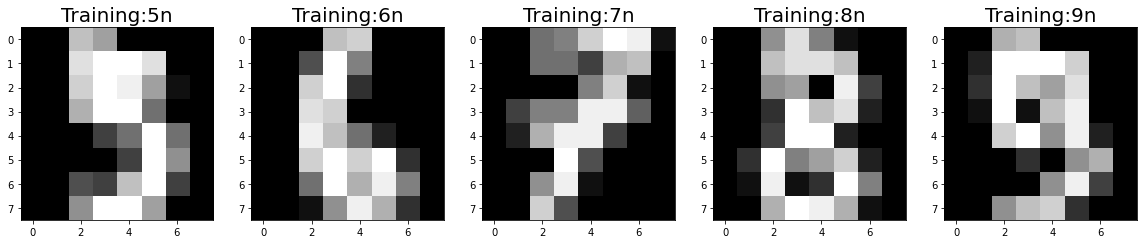

In [9]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate (zip(digits.data[5:10],digits.target[5:10])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%in' % label ,fontsize=20)


- Split the data

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


- Model Train and Fit the model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train,y_train) 

C:\Users\AsJad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# # data prediction
predictions = model.predict(X_test)

In [14]:
# accuracy test
score = model.score(X_test,y_test)
score

0.9666666666666667

In [15]:
# use to show error in prediction
from sklearn import metrics
cm =metrics.confusion_matrix(y_test,predictions)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

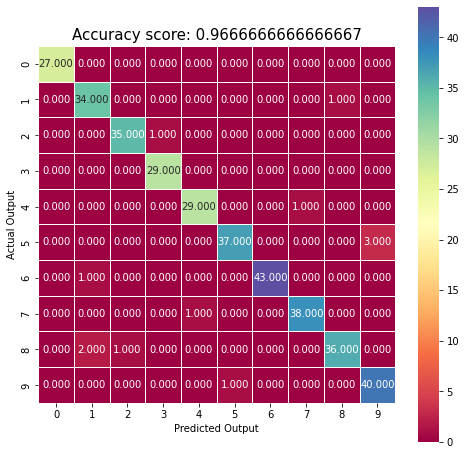

In [16]:
# heat map for graphical representation
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap = 'Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [17]:
index = 0
missclassifiedIndexes = []
for lable,predict in zip(y_test,predictions):
    if label != predict:
        missclassifiedIndexes.append(index)
        index +=1

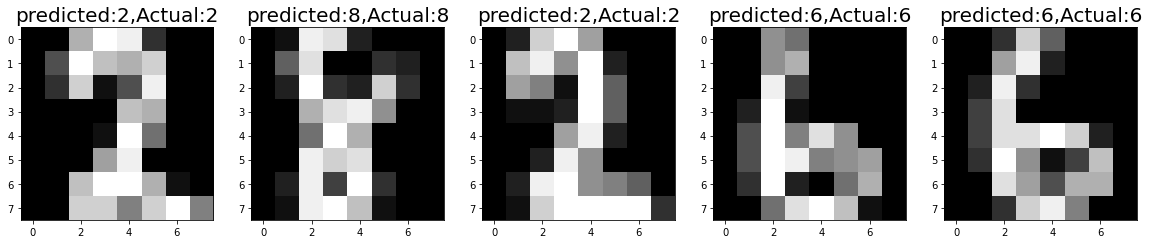

In [18]:
plt.figure(figsize=(20,4))
for plotIndex,badIndex in enumerate (missclassifiedIndexes[0:5]):
    plt.subplot(1,5,plotIndex+1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title('predicted:{},Actual:{}'.format(predictions[badIndex],y_test[badIndex]),fontsize=20)